## Model description

See the wikipedia entry [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations).

The model description is taken from [this resource](https://ths.rwth-aachen.de/research/projects/hypro/lotka-volterra/).

The 2-dimensional Lotka-Volterra system depicts the populations change of a class of predators and a class of
preys. The growth rate of preys’ population $x$ over time is given by 

$$
\dot{x} = x\cdot (\alpha - \beta \cdot y)
$$
wherein  $\alpha, \beta$ are constant parameters and $y$ is the population of predators.

It gives that the number of preys grows exponentially without predation.

The population growth of predators is governed by the differential equation

$$
\dot{y} = -y\cdot (\gamma - \delta\cdot x)
$$
wherein  $\gamma, \delta$ are constant parameters. 

We set those parameters as  $\alpha = 1.5 ,  \beta = 1 ,  \gamma = 3$  and  $\delta = 1$.


In [2]:
using Reachability, TaylorIntegration, MathematicalSystems

In [5]:
@taylorize function lotka_volterra!(du, u, p, t)
    local α = 1.5
    local β = 1.0
    local γ = 3.0
    local δ = 1.0

    du[1] = u[1] * (α - β*u[2])
    du[2] = -u[2] * (γ - δ*u[1])
    
    return du
end

## Reachability settings

We consider the initial set  $x\in [4.8,5.2], y \in [1.8,2.2]$.

In [14]:
Xo = Hyperrectangle(low=[4.8, 1.8], high=[5.2, 2.2]);

In [9]:
S = BlackBoxContinuousSystem(lotka_volterra!, 2)
P = InitialValueProblem(S, Xo);

## Results

We compute the flowpipe using the TMJets algorithm for the time horizon $[0,5]$:

In [19]:
sol = solve(P, Options(:T=>5.0), op=TMJets(Options(:max_steps=>1_000, :orderT=>8, :orderQ=>2,
                                                   :output_type=>Zonotope)));

In [39]:
using Plots, LaTeXStrings
gr()

Plots.GRBackend()

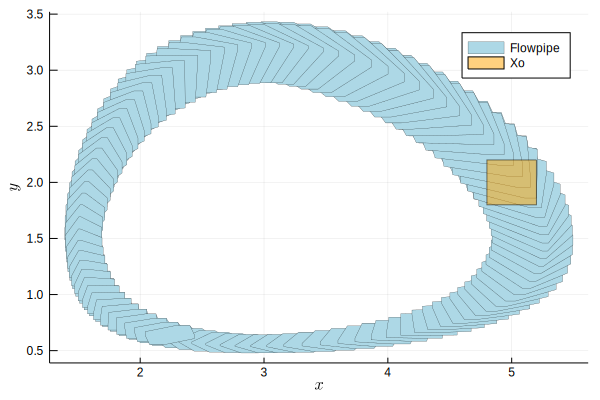

In [37]:
plot(sol, xlab=L"x", ylab=L"y", lw=0.2, color=:lightblue, lab="Flowpipe")
plot!(Xo, color=:orange, lab="Xo")